In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# method to plot centroids
def plot(data, centroids):
    f, axes = plt.subplots(1, 3)
    axes = axes.flatten()

    if len(centroids):
        f.suptitle('Centroid % d'%(centroids.shape[0]), fontsize=14)
    else:
        f.suptitle('Plotting data points', fontsize=14)

    axes[0].scatter(data[:, 0], data[:, 1], marker = '.',  color = 'gray', label = 'data points')
    if len(centroids):
        axes[0].scatter(centroids[:-1, 0], centroids[:-1, 1],  color = 'blue', label = 'previous centroids')
        axes[0].scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next centroid')
    axes[0].set_xlabel('X1')
    axes[0].set_ylabel('X2')
    axes[0].legend(loc='center left', bbox_to_anchor=(4, 0.5))

    axes[1].scatter(data[:, 1], data[:, 2], marker = '.', color = 'gray', label = 'data points')
    if len(centroids):
        axes[1].scatter(centroids[:-1, 1], centroids[:-1, 2],  color = 'blue', label = 'previous centroids')
        axes[1].scatter(centroids[-1, 1], centroids[-1, 2], color = 'red', label = 'next centroid')
    axes[1].set_xlabel('X2')
    axes[1].set_ylabel('X3')

    axes[2].scatter(data[:, 2], data[:, 3], marker = '.', color = 'gray', label = 'data points')
    if len(centroids):
        axes[2].scatter(centroids[:-1, 2], centroids[:-1, 3],  color = 'blue', label = 'previous centroids')
        axes[2].scatter(centroids[-1, 2], centroids[-1, 3], color = 'red', label = 'next centroid')
    axes[2].set_xlabel('X3')
    axes[2].set_ylabel('X4')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

# method to plot centroids
def plot_centroids(data, centroids):
    f, axes = plt.subplots(1, 3)
    axes = axes.flatten()

    f.suptitle('Plotting data points and centroids', fontsize=14)

    axes[0].scatter(data[:, 0], data[:, 1], marker = '.',  color = 'gray', label = 'data points')
    axes[0].scatter(centroids[:, 0], centroids[:, 1],  color = 'blue', label = 'centroids')
    axes[0].set_xlabel('X1')
    axes[0].set_ylabel('X2')
    axes[0].legend(loc='center left', bbox_to_anchor=(4, 0.5))

    axes[1].scatter(data[:, 1], data[:, 2], marker = '.', color = 'gray', label = 'data points')
    axes[1].scatter(centroids[:, 1], centroids[:, 2],  color = 'blue', label = 'centroids')
    axes[1].set_xlabel('X2')
    axes[1].set_ylabel('X3')

    axes[2].scatter(data[:, 2], data[:, 3], marker = '.', color = 'gray', label = 'data points')
    axes[2].scatter(centroids[:, 2], centroids[:, 3],  color = 'blue', label = 'centroids')
    axes[2].set_xlabel('X3')
    axes[2].set_ylabel('X4')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

# method to get the euclidean distance
def get_euclidean_distance(point_x, point_y):
	return np.sqrt(np.sum((point_x - point_y)**2))

# initialization algorithm
def get_cluster_centroids(data, no_of_clusters):
    '''
    Getting the centroids for K-means++

    inputs:
        data - numpy array of our data
        k - desired number of clusters
    '''
    ## select a random datapoint as first centroid
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))

    ## compute remaining no_of_clusters - 1 cluster centroids
    for id in range(no_of_clusters - 1):

        ## find the distance of data points from nearest centroid
        min_centroid_dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            min_distance = -1

            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = get_euclidean_distance(point, centroids[j])
                min_distance = temp_dist if j==0 else min(min_distance, temp_dist)
            min_centroid_dist.append(min_distance)


		# find data point with maximum distance from any centroid
        min_centroid_dist = np.array(min_centroid_dist)
        index_of_farthest_data_point = np.argmax(min_centroid_dist)

        ## set data point as next centroid
        next_centroid = data[index_of_farthest_data_point, :]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))
    return centroids

In [2]:
def update_clusters(clusters):
    for i in range(k):
        data_points = np.array(clusters[i]['data_points'])
        new_center = data_points.mean(axis = 0)
        clusters[i]['center'] = new_center
        clusters[i]['data_points'] = []
    return clusters

def get_cluster(point, clusters):
    dist = []
    for i in clusters:
        dist.append(get_euclidean_distance(point, clusters[i]['center']))
    return np.argmin(dist)


def assign_clusters(data_points, clusters):
    for idx in range(data_points.shape[0]):
        curr_cluster = get_cluster(data_points[idx], clusters)
        clusters[curr_cluster]['data_points'].append(data_points[idx])
    return clusters

def pred_cluster(data_points, clusters):
    pred = []
    for i in range(data_points.shape[0]):
        dist = []
        for j in clusters:
            dist.append(get_euclidean_distance(data_points[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [3]:
import pandas as pd 
data = np.array(pd.read_csv('cluster_data1.csv'))
k = 3

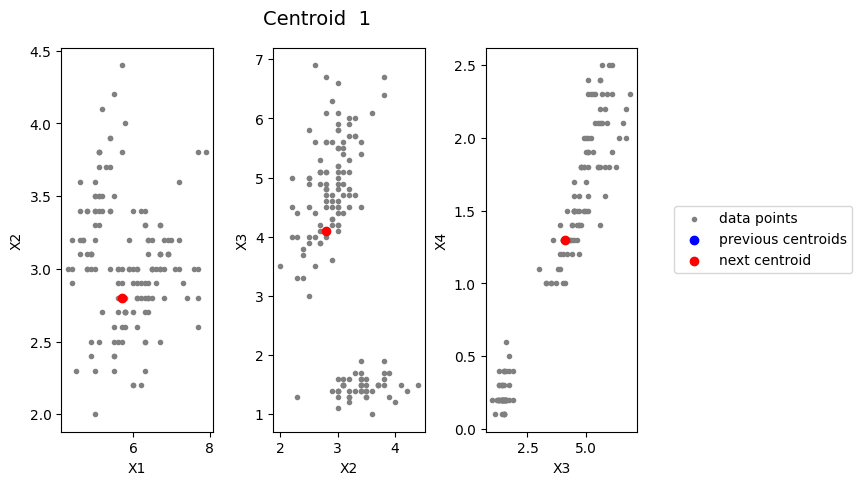

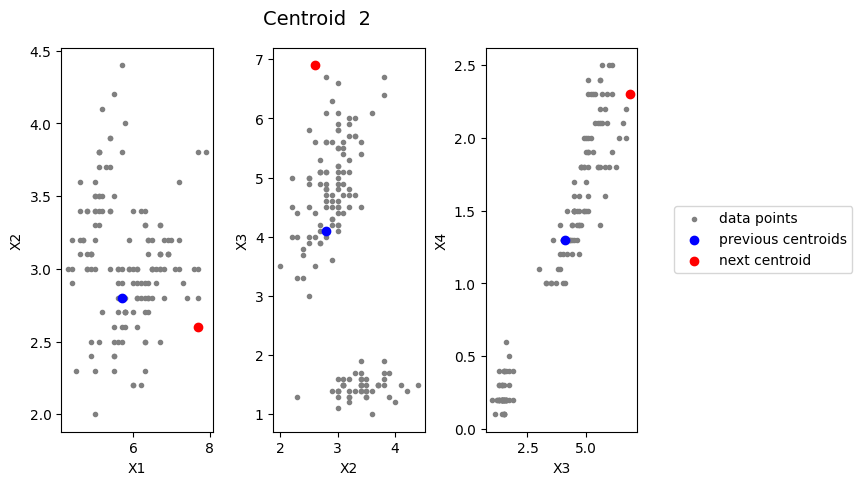

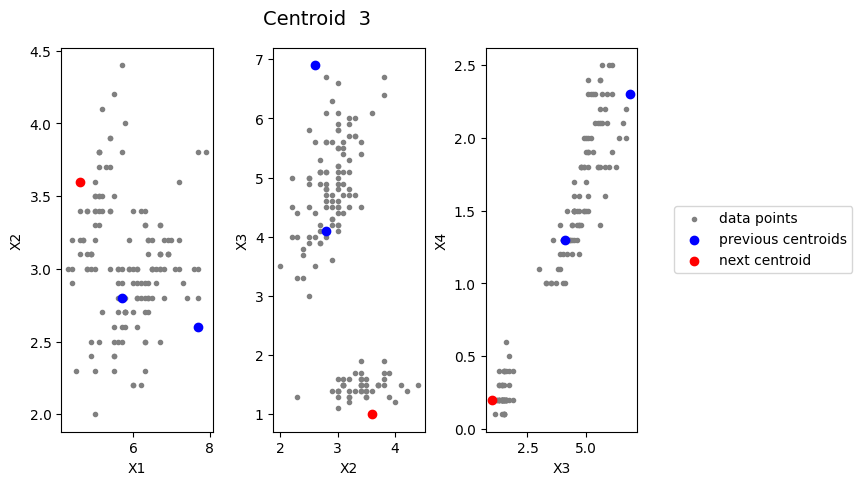

In [4]:
# call the initialize function to get the centroids
centroids = get_cluster_centroids(data, no_of_clusters = k)

## initilize clusters


# Assign a variable to get cluster using centroids from kmeans ++ 

In [5]:
clusters = {}
for i in range(k):
    clusters[i] = {}
    clusters[i]['center'] = centroids[i]
    clusters[i]['data_points'] = []

Initial centroids:  [[5.7 2.8 4.1 1.3]
 [7.7 2.6 6.9 2.3]
 [4.6 3.6 1.  0.2]]


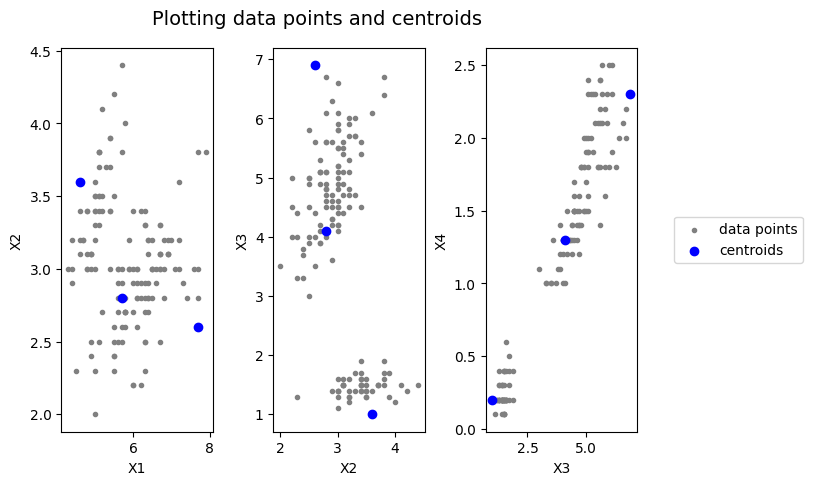

In [6]:
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Initial centroids: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 1:  [[6.01428571 2.8038961  4.57532468 1.53896104]
 [7.09130435 3.1        6.01304348 2.13478261]
 [5.006      3.418      1.464      0.244     ]]


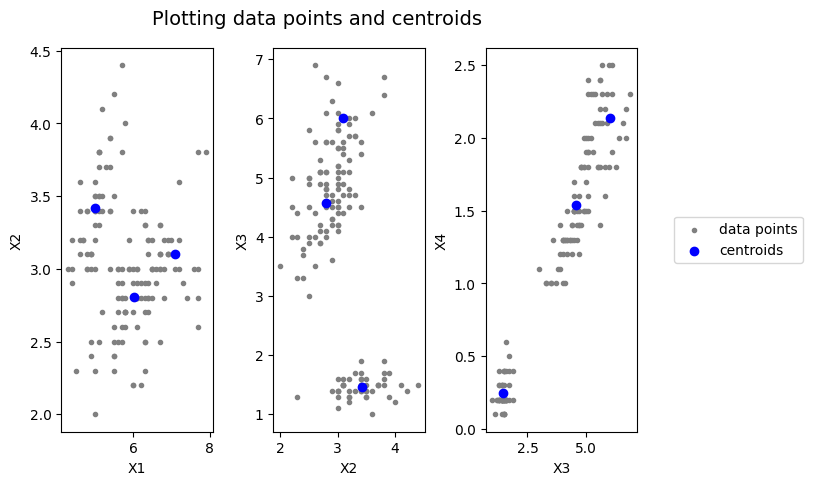

In [7]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 1: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 2:  [[5.95588235 2.76470588 4.46323529 1.46176471]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.418      1.464      0.244     ]]


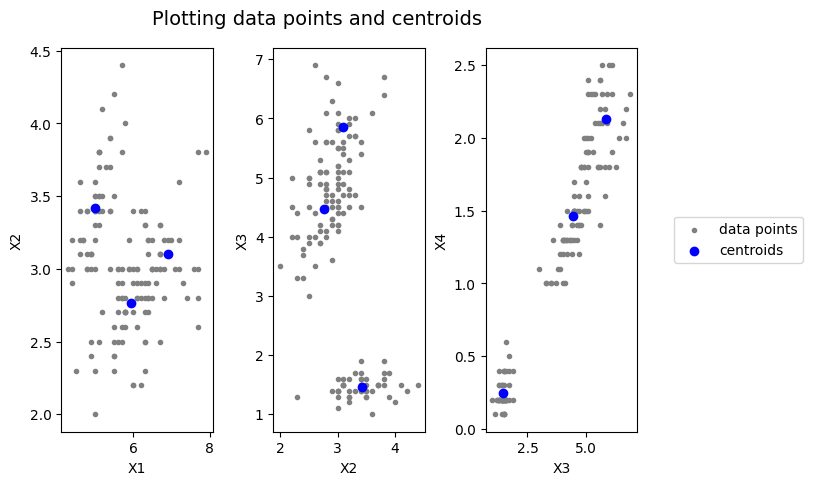

In [8]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 2: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 3:  [[5.93230769 2.75538462 4.42923077 1.43846154]
 [6.87428571 3.08857143 5.79142857 2.11714286]
 [5.006      3.418      1.464      0.244     ]]


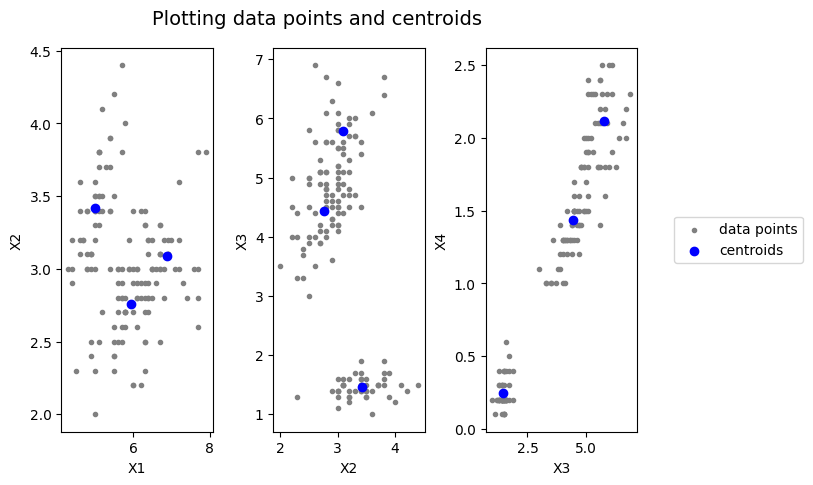

In [9]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 3: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 4:  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]]


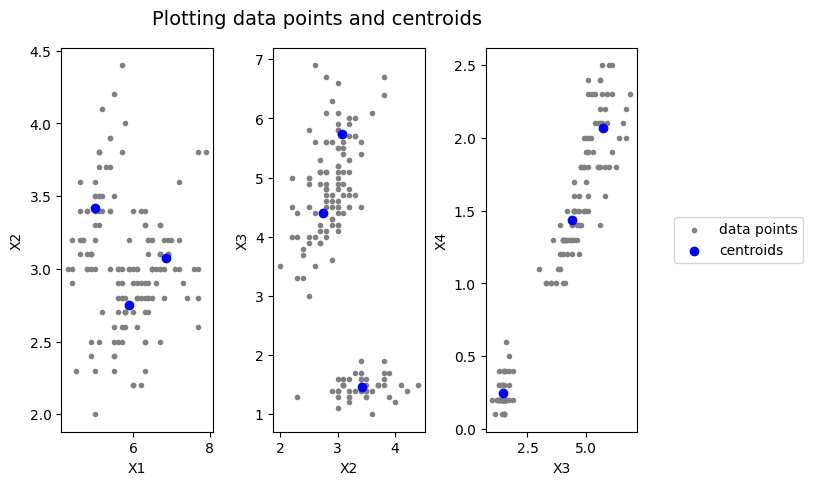

In [10]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 4: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 5:  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]]


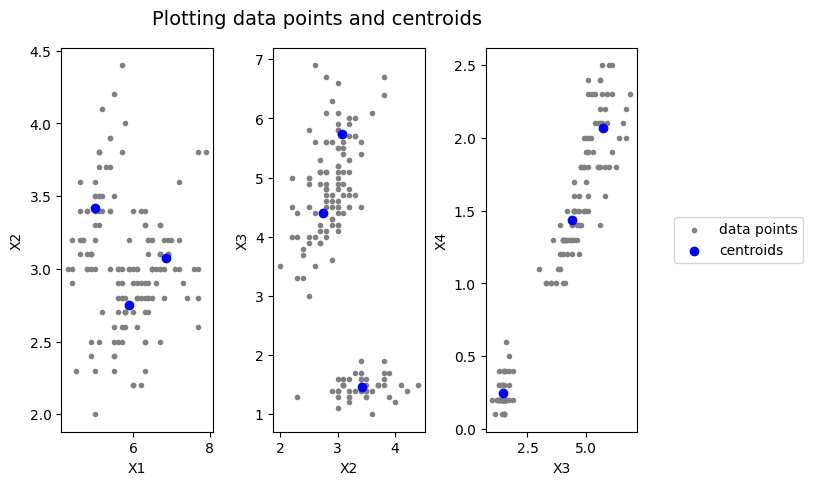

In [11]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 5: ", centroids)
plot_centroids(data, centroids)

# predict on new data

In [13]:
# reading the dataset
new_data = pd.read_csv('cluster_data2.csv')

pred = pred_cluster(np.array(new_data), clusters)
new_data['clusters'] = pred
print("predicted clusters for data 2", pred)
new_data

predicted clusters for data 2 [2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0]


,X1,X2,X3,X4,clusters
0,5.21,3.65,1.42,0.25,2
1,5.07,3.41,1.43,0.19,2
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,0
4,6.55,2.90,5.54,2.05,1
5,5.83,2.75,4.27,1.34,0
6,4.86,3.31,1.45,0.22,2
7,6.63,2.96,5.50,1.93,1
8,5.01,3.39,1.55,0.27,2
9,6.45,3.03,5.33,2.17,1


# Initialize centroids randomly 

In [14]:
clusters = {}
random_data_points = pd.read_csv('cluster_data1.csv').sample(k).values

for i in range(k):
    clusters[i] = {}
    clusters[i]['center'] = random_data_points[i]
    clusters[i]['data_points'] = []

Initial centroids:  [[7.2 3.2 6.  1.8]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 5.1 1.9]]


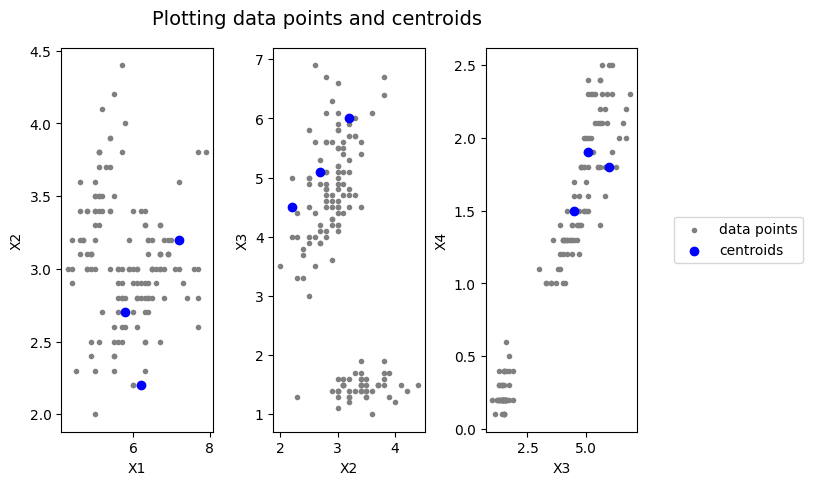

In [15]:
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Initial centroids: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 1:  [[7.10416667 3.1125     5.94583333 2.1125    ]
 [5.41521739 3.08695652 2.70108696 0.71521739]
 [6.11176471 2.92352941 5.07647059 1.86176471]]


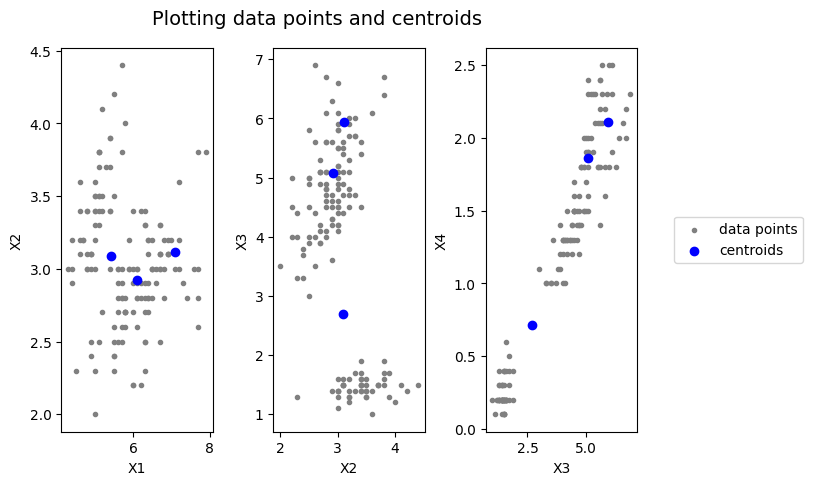

In [16]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 1: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 2:  [[7.11304348 3.11304348 5.99130435 2.13913043]
 [5.05666667 3.26       1.81166667 0.38666667]
 [6.1119403  2.84925373 4.7358209  1.60298507]]


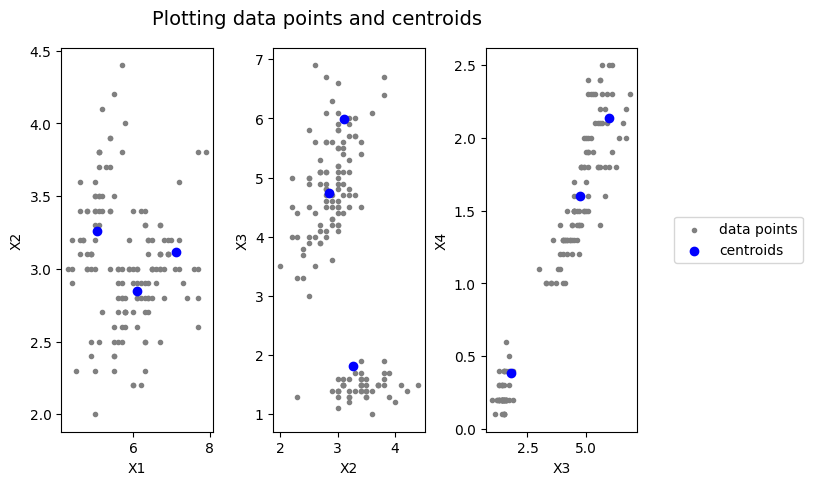

In [17]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 2: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 3:  [[6.99642857 3.09285714 5.90357143 2.14285714]
 [5.00566038 3.36037736 1.56226415 0.28867925]
 [6.01884058 2.80289855 4.57536232 1.51449275]]


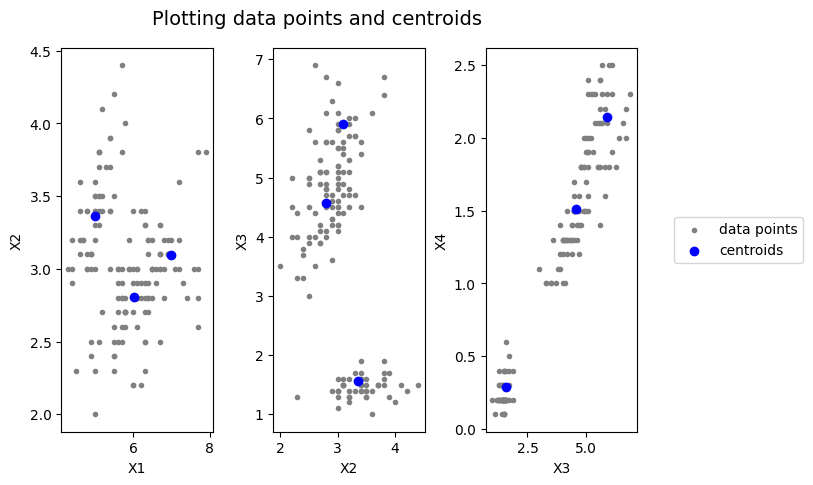

In [18]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 3: ", centroids)
plot_centroids(data, centroids)

Current centroids iteration 4:  [[6.9        3.0969697  5.82727273 2.12727273]
 [5.00784314 3.4        1.49411765 0.26078431]
 [5.96060606 2.76515152 4.47424242 1.45909091]]


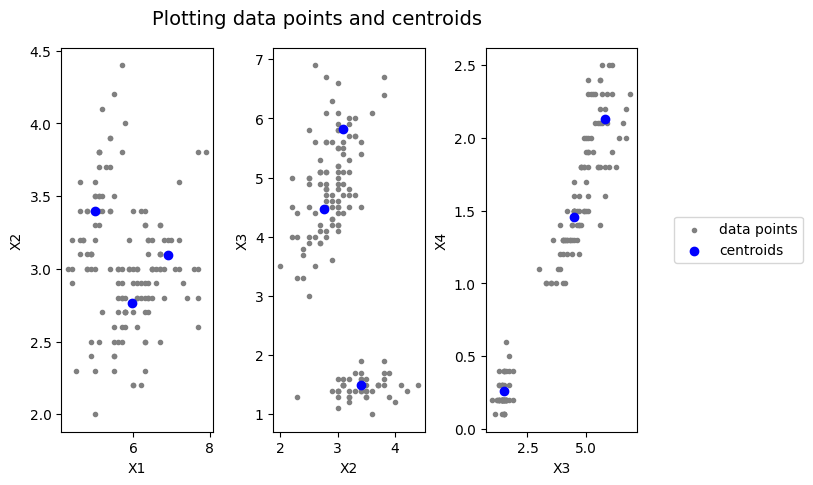

In [19]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 4: ", centroids)
plot_centroids(data, centroids)
         


Current centroids iteration 5:  [[6.86944444 3.08611111 5.76944444 2.10555556]
 [5.006      3.418      1.464      0.244     ]
 [5.9203125  2.7515625  4.4203125  1.434375  ]]


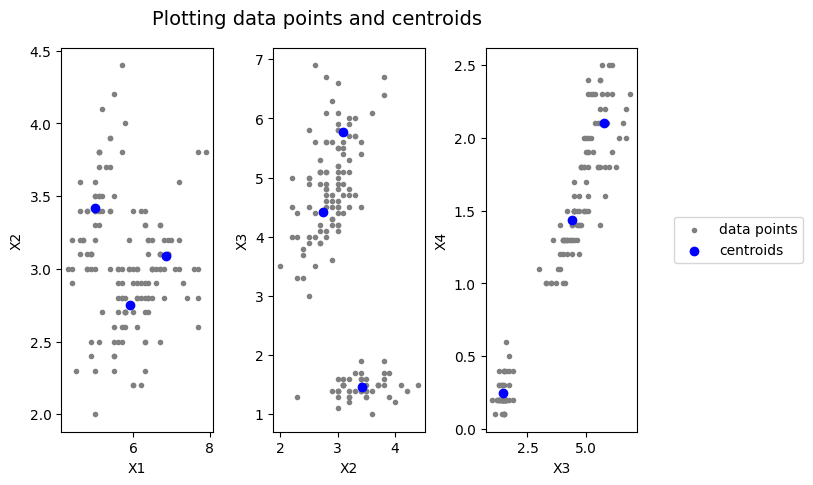

In [20]:
# get data points for cluster
clusters = assign_clusters(data, clusters)

# update cluster centers
clusters = update_clusters(clusters)

# plotting new clusters centroids 
centroids = np.array([clusters[i]['center'] for i in clusters])
print("Current centroids iteration 5: ", centroids)
plot_centroids(data, centroids)   


In [21]:
# reading the dataset
new_data = pd.read_csv('cluster_data2.csv')

pred = pred_cluster(np.array(new_data), clusters)
new_data['clusters'] = pred
print("predicted clusters for data 2", pred)

predicted clusters for data 2 [1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2]


In [22]:
new_data

,X1,X2,X3,X4,clusters
0,5.21,3.65,1.42,0.25,1
1,5.07,3.41,1.43,0.19,1
2,5.85,2.65,4.14,1.27,2
3,5.64,2.73,4.03,1.23,2
4,6.55,2.90,5.54,2.05,0
5,5.83,2.75,4.27,1.34,2
6,4.86,3.31,1.45,0.22,1
7,6.63,2.96,5.50,1.93,0
8,5.01,3.39,1.55,0.27,1
9,6.45,3.03,5.33,2.17,0
